# Handwritten Digit Recognition Comparison 
     Hamza Mustafa (hamxam1.github.io)



In this deep learning task, A comparison of MLP with CNN.
 
 I have used the prediction error to compare the models.



## Importing Dataset directly by keras

Here are some handwritten numbers from the dataset.

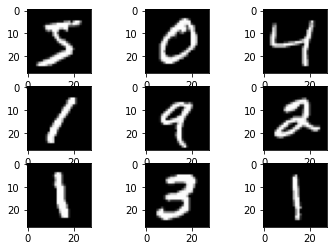

In [19]:
from keras.datasets import mnist 
from matplotlib import pyplot 
 #load
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# create a grid of 3x3 images 
for i in range(0, 9): 
    pyplot.subplot(330 + 1 + i) 
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))

pyplot.show()

## Multilayer Perceptron Model

I am implementing MLP, where image is flatten into 1-D array and grayscale values are normalized to 0-1. 

Finally, we change the categories 1-9 into a binary matrix.

Our  network structure is as follows:

**Input Layer (784 Inputs) >> Hidden Layer (784 Neurons) >> Output Layer (10 Outputs)**

In [18]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
#random seed for reproduction
seed = 7
numpy.random.seed(seed)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

def mlp():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = mlp()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("MLP Error: %.2f%%" % (100-scores[1]*100))


Epoch 1/10
300/300 - 1s - loss: 0.2830 - accuracy: 0.9182 - val_loss: 0.1424 - val_accuracy: 0.9580 - 1s/epoch - 5ms/step
Epoch 2/10
300/300 - 1s - loss: 0.1108 - accuracy: 0.9678 - val_loss: 0.0933 - val_accuracy: 0.9724 - 806ms/epoch - 3ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0716 - accuracy: 0.9794 - val_loss: 0.0750 - val_accuracy: 0.9767 - 845ms/epoch - 3ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0504 - accuracy: 0.9857 - val_loss: 0.0672 - val_accuracy: 0.9784 - 802ms/epoch - 3ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0375 - accuracy: 0.9893 - val_loss: 0.0650 - val_accuracy: 0.9789 - 827ms/epoch - 3ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0269 - accuracy: 0.9930 - val_loss: 0.0613 - val_accuracy: 0.9799 - 763ms/epoch - 3ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0185 - accuracy: 0.9953 - val_loss: 0.0631 - val_accuracy: 0.9803 - 830ms/epoch - 3ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0141 - accuracy: 0.9970 - val_loss: 0.0581 - val_accuracy: 0.9822 - 838ms/epoch - 3ms/step
Epo

## Convolutional Neural Network for MNIST

As we have seen above, we achieved around 1-2% error. Now, i will take convolutional neural networks. I will apply CNN implementation, including convolutional layers, pooling layers, and dropout layers.

Model is like this (can changes with time ):
1. We add a convolutional layer with 32 feature maps, with a size of 5 x 5. This is also our input layer which expects images to be added.
2. We then define a pool size of 2 x 2.
3. We randomly dropout 20% of our neurons to reduce the amount of overfitting.
4. We then flatten our data.
5. We add 128 neurons activation function.
6. Finally we use 10 neurons for the 10 prediction classes with a softmax activation function to output probability-like prediction for each class.

Our current neural network structure is as follows:

**Input Layer (1x28x28 Inputs) >> Convolutional Layer (32 maps, 5x5) >> Max Pooling Layer (2x2) >> Dropout Layer (20%) >> Flatten Layer >> Hidden Layer (128 Neurons) >> Output Layer (10 Outputs)**

In [6]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_dim_ordering='channel_first'
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape image into (samples,channel,width,height)
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

def cnn():

	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28,28), activation='relu', padding='same', data_format='channels_first'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 10s 7ms/step - loss: 0.2386 - accuracy: 0.9324 - val_loss: 0.0759 - val_accuracy: 0.9767
Epoch 2/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0736 - accuracy: 0.9772 - val_loss: 0.0474 - val_accuracy: 0.9846
Epoch 3/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0518 - accuracy: 0.9843 - val_loss: 0.0455 - val_accuracy: 0.9842
Epoch 4/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0406 - accuracy: 0.9875 - val_loss: 0.0498 - val_accuracy: 0.9834
Epoch 5/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0398 - val_accuracy: 0.9870
Epoch 6/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0368 - val_accuracy: 0.9875
Epoch 7/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0218 - accuracy: 0.9933 - val_loss: 0.0382 - val_accuracy: 0.9879
Epoch

## More deep Convolutional Neural Network

Here i got around 1% error, can i reduce it more. I have learnt it that making it deep can help it.

New neural network :

**Input Layer (1x28x28 Inputs) >> Convolutional Layer (30 maps, 5x5) >> Max Pooling Layer (2x2) >> Convolutional Layer (15 maps, 3x3) >> Max Pooling Layer (2x2) >> Dropout Layer (20%) >> Hidden Layer (128 Neurons) >> Hidden Layer (50 Neurons) >> Output Layer (10 Outputs)**

In [9]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_dim_ordering='channel_first'
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

def cnn_2():

	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), padding='same', data_format='channels_first'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = cnn_2()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Deep CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4175 - accuracy: 0.8751 - val_loss: 0.1027 - val_accuracy: 0.9685
Epoch 2/10
300/300 [==============================] - 2s 5ms/step - loss: 0.1138 - accuracy: 0.9653 - val_loss: 0.0601 - val_accuracy: 0.9815
Epoch 3/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0817 - accuracy: 0.9751 - val_loss: 0.0538 - val_accuracy: 0.9827
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0659 - accuracy: 0.9803 - val_loss: 0.0440 - val_accuracy: 0.9866
Epoch 5/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0586 - accuracy: 0.9816 - val_loss: 0.0431 - val_accuracy: 0.9855
Epoch 6/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0499 - accuracy: 0.9843 - val_loss: 0.0369 - val_accuracy: 0.9882
Epoch 7/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0442 - accuracy: 0.9861 - val_loss: 0.0308 - val_accuracy: 0.9904
Epoch 

## Result

As i applied more convolutional neural network , i was able to go from 1-2% prediction error to less than 1%. 0.93% error can still be improved by tunning hyperparameter. I have studied in class about augentation techniques, which are applied below: 

###Augmentation Techniques



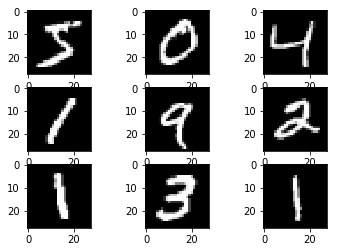

In [ ]:
from keras.datasets import mnist 
from matplotlib import pyplot 
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# create a grid of 3x3 images 
for i in range(0, 9): 
    pyplot.subplot(330 + 1 + i) 
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

### Random Rotations

I used keras datagenerator for this purpose, i will rotate the images in batch of 9.

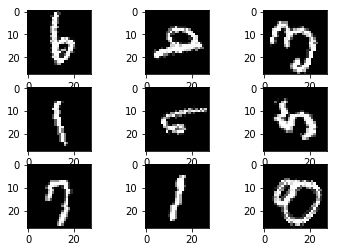

In [ ]:
# Random Rotations
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.image_dim_ordering='channel_first'
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break